## fiTQun e/pi0 discrimination

This notebook was created to compare the performance of fiTQun to CNN for e/pi0 discrimination

In [54]:
from __future__ import print_function
from IPython.display import display
import torch, time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
myFQData = np.load('/data/hkml_data/fiTQun/IWCDgrid/varyAll/pi0/IWCDgrid_varyAll_pi0_20-2000MeV_100evts_9.fiTQun.npz')
myFQList = myFQData.files

In [3]:
myFQeData = np.load('/data/hkml_data/fiTQun/IWCDgrid/varyAll/e-/IWCDgrid_varyAll_e-_20-2000MeV_100evts_9.fiTQun.npz')

In [4]:
print(len(myFQData['fqpi0mass']))
for event in range(6):
    print(myFQData['fqpi0mass'][event][0])

100
60.04059982299805
116.56013488769531
13.888847351074219
95.9423828125
126.1881332397461
31.74525260925293


<IPython.core.display.Javascript object>


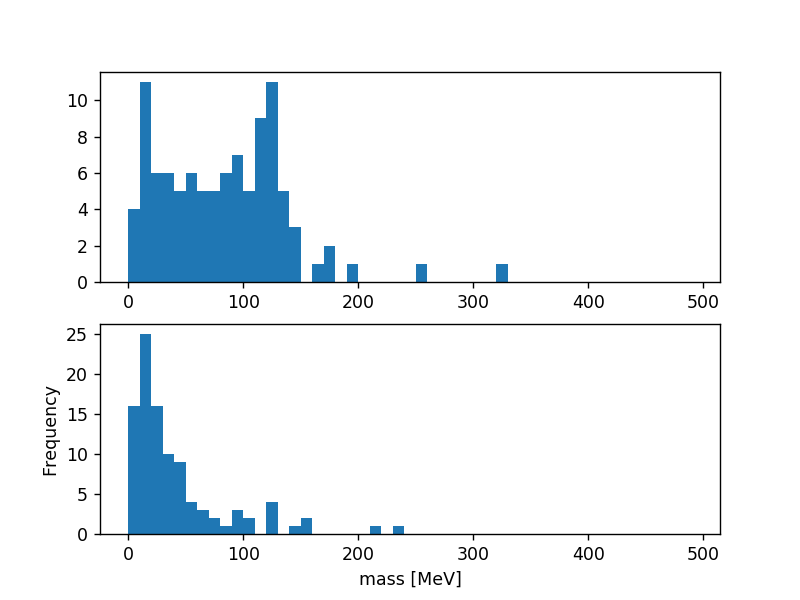

In [5]:
fig, axes = plt.subplots(2)

pi0mass = []
for event in range(len(myFQData['fqpi0mass'])):
    pi0mass.append(myFQData['fqpi0mass'][event][0])

axes[0].hist(pi0mass,bins=np.arange(0.,500.,10.))


pi0mass = []
for event in range(len(myFQeData['fqpi0mass'])):
    pi0mass.append(myFQeData['fqpi0mass'][event][0])

axes[1].hist(pi0mass,bins=np.arange(0.,500.,10.))
plt.xlabel("mass [MeV]")
plt.ylabel("Frequency");


<IPython.core.display.Javascript object>


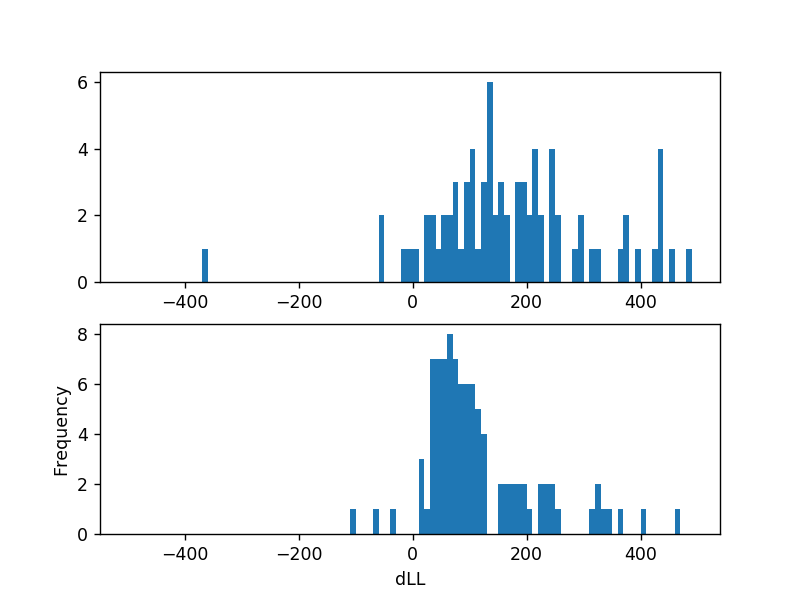

In [6]:
fig, axes = plt.subplots(2)

dll = []
for event in range(len(myFQData['fq1rnll'])):
    dll.append(-1.*(myFQData['fqpi0nll'][event][0]-myFQData['fq1rnll'][event][0][1]))

axes[0].hist(dll,bins=np.arange(-500.,500.,10.))

dll = []
for event in range(len(myFQeData['fq1rnll'])):
    dll.append(-1.*(myFQeData['fqpi0nll'][event][0]-myFQeData['fq1rnll'][event][0][1]))

axes[1].hist(dll,bins=np.arange(-500.,500.,10.))

plt.xlabel("dLL")
plt.ylabel("Frequency");

In [58]:
def getEventData(iEvent,particle='e-',type='data'):
    eventData = []
    dataLabels = []
    
    dataLabels.append('particle')
    if type=='data':
        eventData.append(particle)
    
    dataLabels.append('fqpi0mass')
    if type=='data':
        eventData.append(myFQData['fqpi0mass'][iEvent][0])

    dataLabels.append('dLL')
    if type=='data':
        eventData.append(-1.*(myFQData['fqpi0nll'][iEvent][0]-myFQData['fq1rnll'][iEvent][0][1]))
        
    dataLabels.append('barrelQ')
    if type=='data':
        eventData.append(np.sum(myData['event_data'][iEvent,:,:,0]))
    
    dataLabels.append('fqtotq')
    if type=='data':
        eventData.append(myFQData['fqtotq'][iEvent][0])
        
    dataLabels.append('barrelFrac')
    if type=='data':
        eventData.append(np.sum(myData['event_data'][iEvent,:,:,0])/myFQData['fqtotq'][iEvent][0])
        
    if type=='data':    
        return eventData
    else:
        return dataLabels
    

In [65]:
# create a pandas dataframe - indexed by a unique event number formed by:
# e- runs: 1,000,000 + fnum*100 + iEvent
# pi0 runs: 2,000,000 + fnum*100 + iEvent

index = []
eventsData = []

#particles = ['e-','pi0']
particles = ['e-']
fnums = range(10)

for iParticle in range(len(particles)):
    particle = particles[iParticle]
    for fnum in fnums:
        myFQData = np.load('/data/hkml_data/fiTQun/IWCDgrid/varyAll/'+particle+'/IWCDgrid_varyAll_'+particle+'_20-2000MeV_100evts_'+str(fnum)+'.fiTQun.npz')
        myData = np.load('/data/hkml_data/IWCDgrid/varyAll/'+particle+'/IWCDgrid_varyAll_'+particle+'_20-2000MeV_100evts_'+str(fnum)+'.npz')
        nEvent = 100
        for iEvent in range(nEvent):
            eventNumber = (iParticle+1)*1000000 + fnum*100 + iEvent

            index.append(eventNumber)
            eventsData.append(getEventData(iEvent,particle=particle))
    

df = pd.DataFrame(eventsData, index=index, columns=getEventData(0,type='labels'))
    

In [66]:
#df

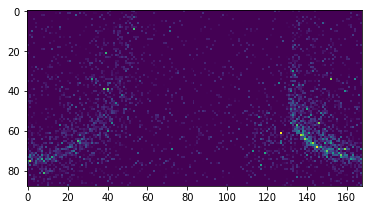

1000010 5362.911164730787 6335.638671875 0.8464673322577061


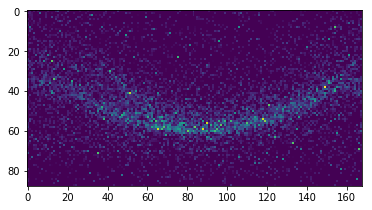

1000011 13124.274623908103 14209.4326171875 0.9236311524524344


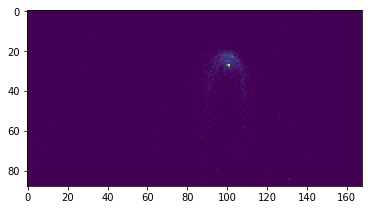

1000012 7006.327540760743 7482.2236328125 0.9363964356846052


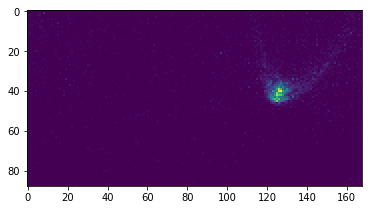

1000013 9955.04708511848 11879.9833984375 0.8379680973651702


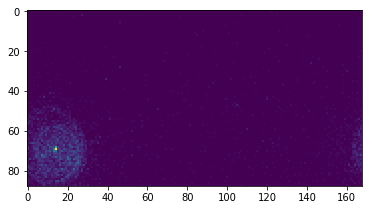

1000014 11035.96833605785 11949.076171875 0.9235833948429948


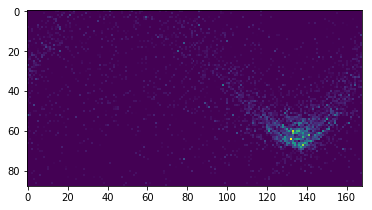

1000015 5854.28333600238 6649.4912109375 0.880410718698731


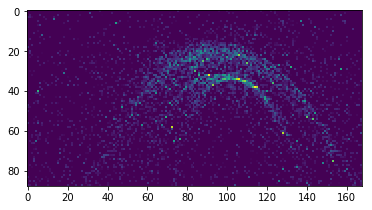

1000016 7907.937754824758 9078.0166015625 0.8711085363584431


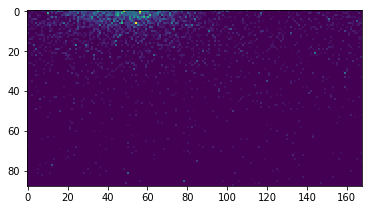

1000017 5000.887510556728 16352.658203125 0.3058149597721706


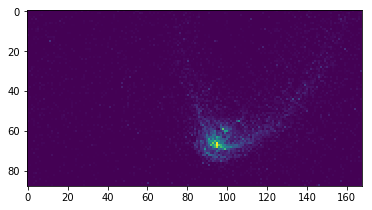

1000018 15364.688838545233 17456.544921875 0.8801678056745103


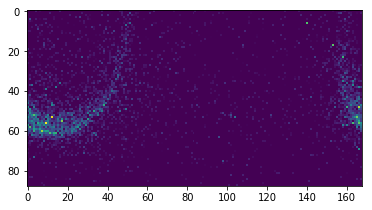

1000019 5975.933024410158 6989.68408203125 0.8549646814185501


In [61]:
for i in range(10,20):
    plt.imshow(myData['event_data'][i,:,:,0])
    plt.show()
    print(df.index.values[i],df['barrelQ'].values[i],df['fqtotq'].values[i],df['barrelQ'].values[i]/df['fqtotq'].values[i])

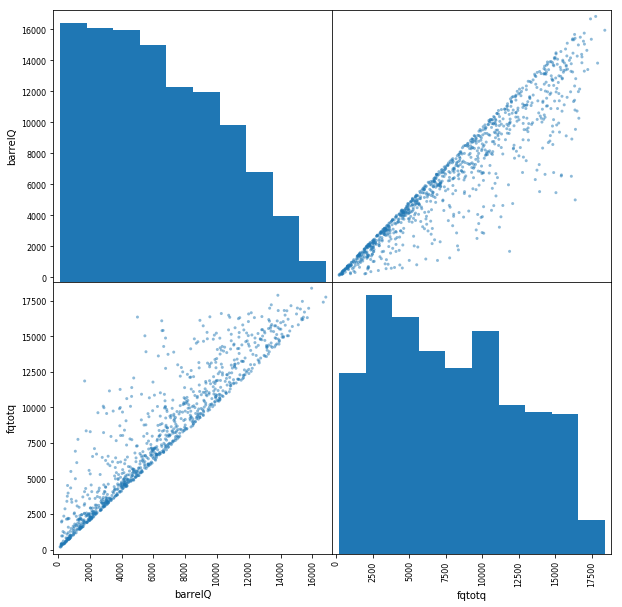

In [67]:
pd.plotting.scatter_matrix(df[['barrelQ', 'fqtotq']],figsize=[10,10]);

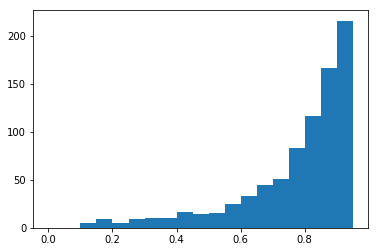

In [72]:
bq = df['barrelQ'].values
fqtq = df['fqtotq'].values
ratio = np.divide(bq,fqtq)

fig, axes = plt.subplots()
plt.hist(ratio,bins=np.arange(0.,1.,0.05))
plt.show()

In [52]:
df['barrelQ'].values[1]

34553.29895019531